In [25]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\etiem\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\etiem\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np

In [28]:
iris = load_iris()

In [29]:
X_array = np.array(X)
y_array = np.ravel(y)

In [30]:
df = pd.DataFrame(np.c_[iris['data'], iris['target']])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [32]:
df.columns = ['sep_length', 'sep_width', 'pet_length', 'pet_width', 'target']

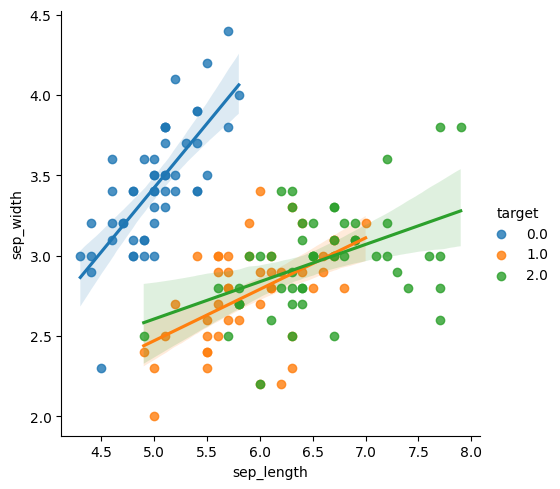

In [33]:
sns.lmplot(x='sep_length', y='sep_width', hue='target', data=df)
# the petals will be good predictors for clasification variables

In [34]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score
rf_pred = rf_model.predict(X_test)
print(accuracy_score(rf_pred,y_test))
lr_pred = lr_model.predict(X_test)
print(accuracy_score(lr_pred,y_test))

1.0
1.0


## Explaining the model

In [36]:
rf_importance = rf_model.feature_importances_
print(rf_importance)
lr_importance = lr_model.coef_
print(lr_importance)

[0.12288296 0.02411183 0.42344089 0.42956432]
[[-0.44286881  0.87246168 -2.3834431  -0.94896907]
 [ 0.45399713 -0.18617667 -0.09223285 -0.93642798]
 [-0.01112832 -0.68628501  2.47567595  1.88539705]]


In [37]:
import shap
import lime

In [38]:
shap.initjs()

In [39]:
explainer = shap.Explainer(rf_model)

In [40]:
shap_values = explainer.shap_values(X_test)

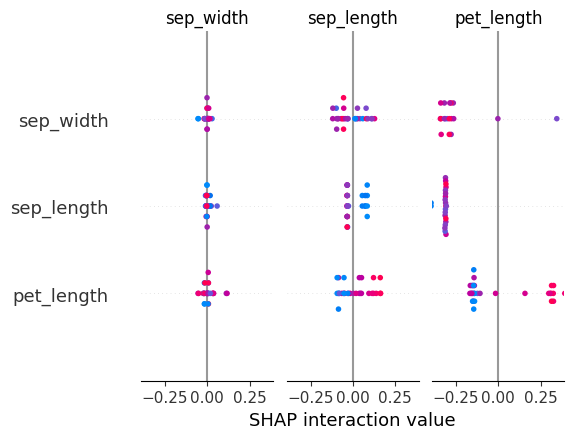

In [41]:
# 100 will be red, 0 will be  blue, the one on the left have side will be negative impact and the one at the right hand side will be positive
# in this case you will want to remove feature 1 since the impacts are all around 0
shap.summary_plot(shap_values, X_test, show=False, max_display=4)

In [42]:
X_test.shape

(30, 4)

In [43]:
shap.force_plot(explainer.expected_value[0], explainer.shap_values(X_test.iloc[0]))

In [44]:
shap.waterfall_plot(explainer.shap)
# 

TypeError: waterfall() missing 1 required positional argument: 'shap_values'

In [46]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.iloc[:,:4], feature_names= df.columns)

InvalidIndexError: (slice(None, None, None), 0)